In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Loading dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Getting basic information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Basic statistical details for numeric attributes
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

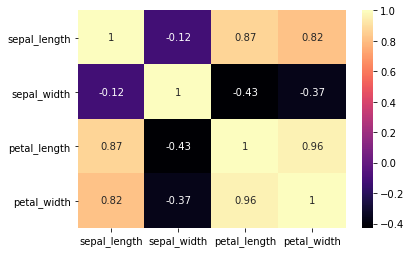

In [6]:
# Heatmap showing correlation between various numeric attributes
plt.figure(figsize=(6,4))
sns.heatmap(iris.corr(),annot=True,cmap="magma")

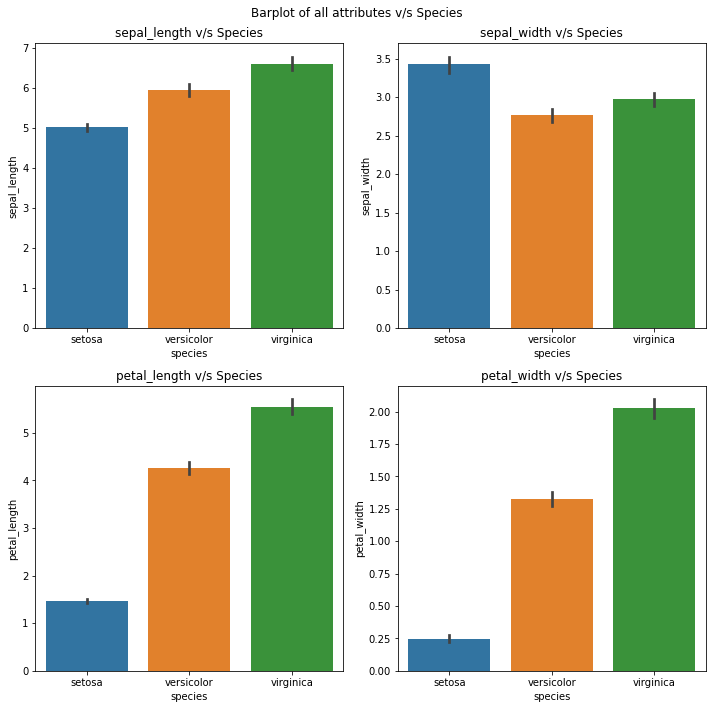

In [7]:
# Barplot of different attributes based on species
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
for r in range(4):
    i, j = r//2, r%2
    axes[i][j].set_title(iris.columns[r]+" v/s Species")
    sns.barplot(x="species",y=iris.columns[r],data=iris,ax=axes[i][j])
    
fig.suptitle("Barplot of all attributes v/s Species")
fig.tight_layout()

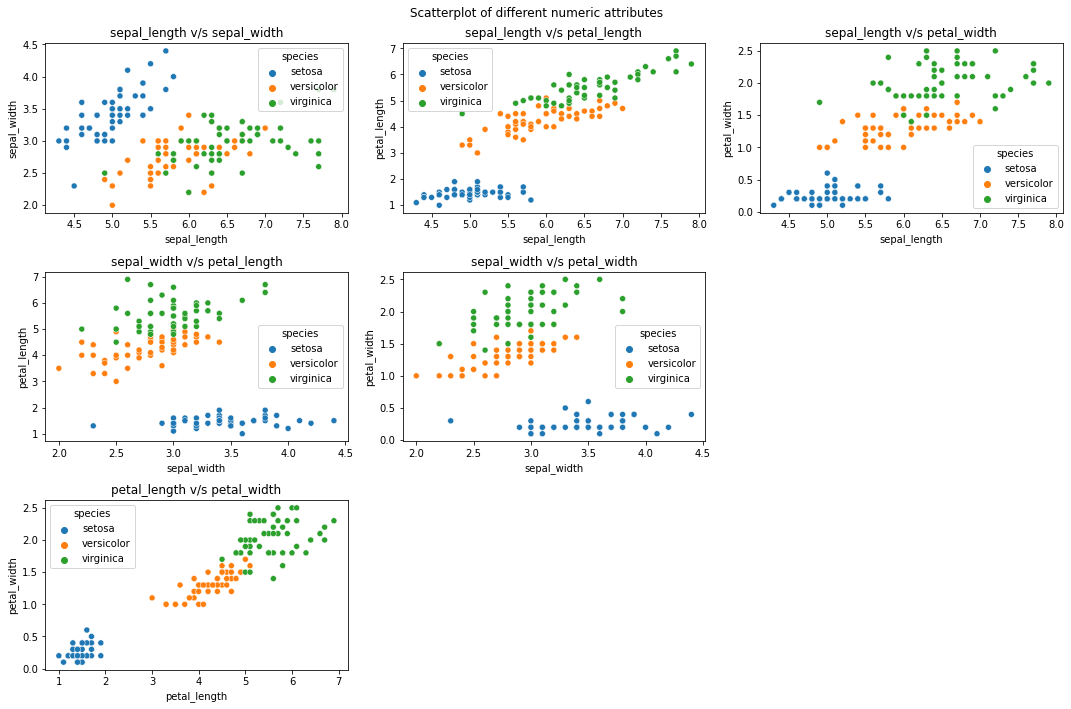

In [8]:
# Scatterplot for each pair of numeric attributes based on species
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
for i in range(4):
 for j in range(i+1,4):
    axes[i][j-i-1].set_title(iris.columns[i]+" v/s "+iris.columns[j])
    sns.scatterplot(x=iris.columns[i],y=iris.columns[j],data=iris,hue='species',ax=axes[i][j-i-1])
fig.suptitle("Scatterplot of different numeric attributes")
fig.delaxes(axes[1][2])
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.tight_layout()

## Calculate the score using cross validation

In [16]:
df=iris
X=df.iloc[:,0:3]
y=df.iloc[:,4]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.76190476, 0.95238095, 0.95238095, 0.85714286, 1.        ])

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


In [20]:
model.fit(X_train,y_train)

GaussianNB()

In [21]:
model.score(X_test,y_test)

0.8888888888888888

### Label Encoding the target variable

In [22]:
#Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

## Train-test Split

In [23]:
from sklearn.model_selection import train_test_split
# Defining the features and labels
X = iris.drop('species',axis=1)
y = iris['species']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
print("Training data shape:",X_train.shape)
print("Training labels shape:",y_train.shape)
print("Test data shape:",X_test.shape)
print("Test labels shape:",y_test.shape)

Training data shape: (105, 4)
Training labels shape: (105,)
Test data shape: (45, 4)
Test labels shape: (45,)


## Normalization

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6.1 Apply Naive Bayes and do the prediction on the planets dataset

In [25]:
from sklearn.naive_bayes import GaussianNB
# Initializing the classifier
gaussian_clf = GaussianNB()
#Training the model
gaussian_clf.fit(X_train,y_train)
print("Training Score: {:.3f}".format(gaussian_clf.score(X_train, y_train)))
print("Test Score: {:.3f}".format(gaussian_clf.score(X_test,y_test)))

Training Score: 0.952
Test Score: 0.956


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print("Model Performance on training data:\n")
print(confusion_matrix(y_train, gaussian_clf.predict(X_train)))
print("")
print(classification_report(y_train, gaussian_clf.predict(X_train)))

Model Performance on training data:

[[37  0  0]
 [ 0 28  2]
 [ 0  3 35]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      0.93      0.92        30
           2       0.95      0.92      0.93        38

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [27]:
from sklearn.neighbors import KNeighborsClassifier
#Finding optimal value of n_neighbors
for i in range(1,21):
 # Initializing and training the model
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train, y_train)

 # Printing the results
    print("No. of nearest neighbors:",i)
    print("Training score: {:.3f}... Test Score: {:.3f}\n".format(knn_clf.score(X_train,y_train),knn_clf.score(X_test,y_test)))

No. of nearest neighbors: 1
Training score: 1.000... Test Score: 0.933

No. of nearest neighbors: 2
Training score: 0.971... Test Score: 0.956

No. of nearest neighbors: 3
Training score: 0.962... Test Score: 0.956

No. of nearest neighbors: 4
Training score: 0.943... Test Score: 0.956

No. of nearest neighbors: 5
Training score: 0.952... Test Score: 0.978

No. of nearest neighbors: 6
Training score: 0.952... Test Score: 0.978

No. of nearest neighbors: 7
Training score: 0.952... Test Score: 1.000

No. of nearest neighbors: 8
Training score: 0.952... Test Score: 1.000

No. of nearest neighbors: 9
Training score: 0.962... Test Score: 1.000

No. of nearest neighbors: 10
Training score: 0.971... Test Score: 0.978

No. of nearest neighbors: 11
Training score: 0.962... Test Score: 1.000

No. of nearest neighbors: 12
Training score: 0.971... Test Score: 1.000

No. of nearest neighbors: 13
Training score: 0.952... Test Score: 0.978

No. of nearest neighbors: 14
Training score: 0.962... Test S

In [28]:

# Initialising and Training the model
knn_clf = KNeighborsClassifier(n_neighbors=12)
knn_clf.fit(X_train, y_train)
# Printing train and test scores
print("Training Score: {:.3f}".format(knn_clf.score(X_train, y_train)))
print("Test Score: {:.3f}".format(knn_clf.score(X_test,y_test)))

Training Score: 0.971
Test Score: 1.000


In [29]:
print("Model Performance on training data:\n")
print(confusion_matrix(y_train, knn_clf.predict(X_train)))
print("")
print(classification_report(y_train, knn_clf.predict(X_train)))

Model Performance on training data:

[[37  0  0]
 [ 0 30  0]
 [ 0  3 35]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      1.00      0.95        30
           2       1.00      0.92      0.96        38

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [30]:
predictions = knn_clf.predict(X_test)
print("Model Performance on test data:\n")
print(confusion_matrix(y_test, predictions))
print("")
print(classification_report(y_test, predictions))

Model Performance on test data:

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

